In [68]:
using OptimalTransport, VegaLite, LinearAlgebra, DataFrames, Distances, LaTeXStrings, Tulip, Distributions, StatsBase
using Distributions
using Plots
using QuadGK
using FillArrays
using LazyArrays
using BenchmarkTools
using Random

using JuMP

optimizer = Tulip.Optimizer();

In [104]:
sig = 1e-2
μ  = MvNormal([0.2,0.3],I*sig)
ν1 = MvNormal([0.6,0.7],I*sig*0.7)
ν2 = MvNormal([0.7,0.4],I*sig*0.7)
ν  = MixtureModel(MvNormal[ν1,ν2], [0.5, 0.5]);

In [143]:
n = 20
p = 20
x = range(0,1,length=n)
y = range(0,1,length=n)
rho= 0.05

f(x,y) = pdf(μ,[x,y]) >= rho ? pdf(μ,[x,y]) : 0.0
g(x,y) = pdf(ν,[x,y]) >= rho ? pdf(ν,[x,y]) : 0.0
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
z = map(f, X, Y);
z = z./sum(z)
μ_supp = hcat(reshape(X,:,1),reshape(Y,:,1))
μ_p    = hcat(reshape(z,:,1))


w = map(g, X, Y)
w = w./sum(w)
ν_supp = hcat(reshape(X,:,1),reshape(Y,:,1))
ν_p    = hcat(reshape(w,:,1));

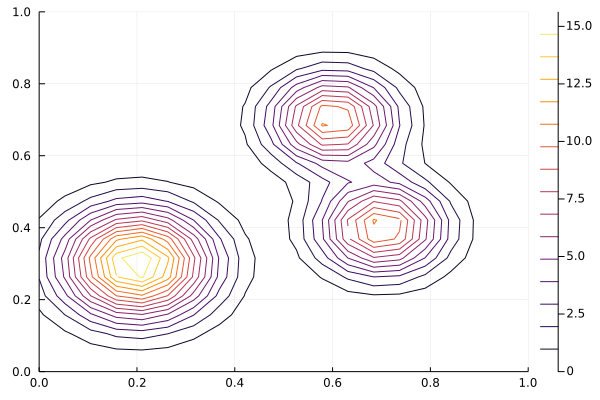

In [145]:
contour(x,y,f)
contour!(x,y,g)

## 1D Case Benamou-Brenier

In [200]:
N = 10
P = 10
Gc_pos  = range(0,1,length=N+1)
Gc_time = range(0,1,length=P+1)

0.0:0.1:1.0

In [205]:
Gxs_pos  = collect((-1:1:N) .+ 1/2 )./N
Gxs_time = collect((0:1:P)./P)


Gts_pos  = collect((0:1:N)./N)
Gts_time = collect((-1:1:P) .+ 1/2 )./P;

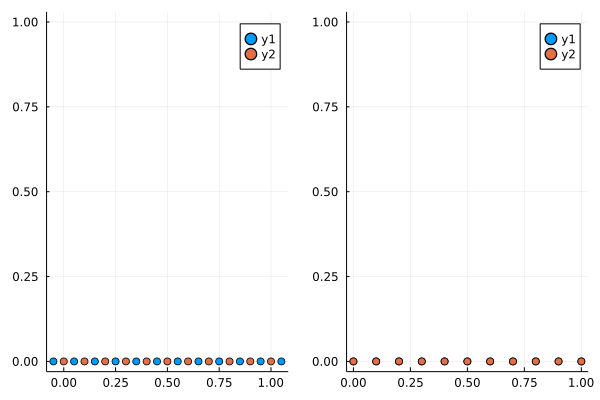

In [209]:
p1 = scatter(Gxs_pos,zeros(N))
p1 = scatter!(Gc_pos,zeros(N))
p2 = scatter(Gxs_time,zeros(N))
p2 = scatter!(Gc_time,zeros(N))
plot(p1,p2)

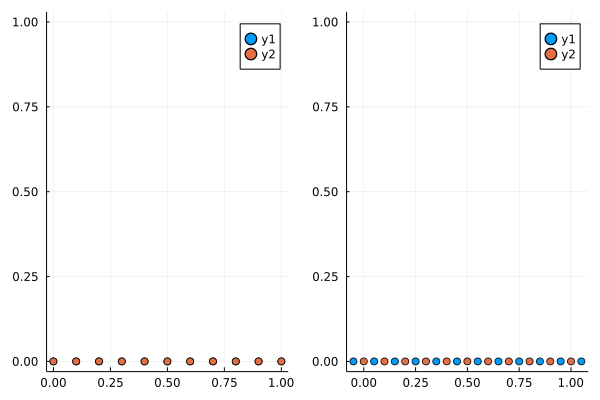

In [211]:
p1 = scatter(Gts_pos,zeros(N))
p1 = scatter!(Gc_pos,zeros(N))
p2 = scatter(Gts_time,zeros(N))
p2 = scatter!(Gc_time,zeros(N))
plot(p1,p2)

In [223]:
# \bscrI, \bscrE
# function 𝓘!(Esm, Esf,Ecm, Ecf)
#     for i in 2:length(Esm)
#         Ecm[i] = (Esm[i-1]+Esm[i])/2
#     end
#     for i in 2:length(Est)
#         Ect[i] = (Est[i-1]+Esm[i])/2
#     end
# end

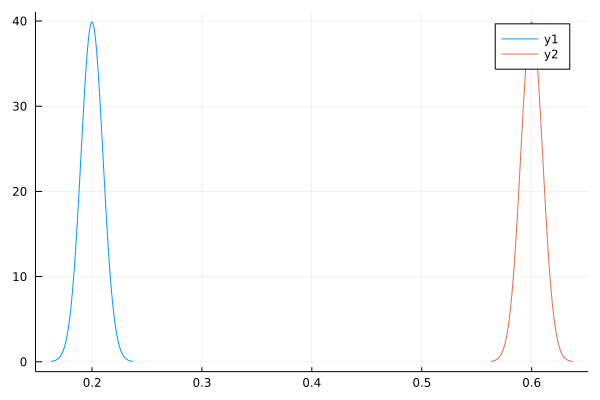

In [231]:
using StatsPlots
f0 = Normal(0.2,0.01)
f1 = Normal(0.6,0.01)
plot(f0)
plot!(f1)
# mtilde = pdf(Normal(),Gxs_pos)